# Exploratory Data Analysis on benchmark result data

In [11]:
from correlations import correlation_heatmap, normalize
from experiments.benchmark import load_results, get_metric
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import numpy as np
import ppscore
import pandas as pd

In [47]:
DATA_DIR = "../../out/ImageNette"
all_data, metadata = load_results(DATA_DIR)
methods = list(all_data.keys())
print("\n".join(methods))

IntegratedGradients
SmoothGrad
GuidedBackprop
Deconvolution
Random
InputXGradient
EdgeDetection
GradCAM
GuidedGradCAM
Gradient


## Correlations between metric results for given method
### Pearson correlation

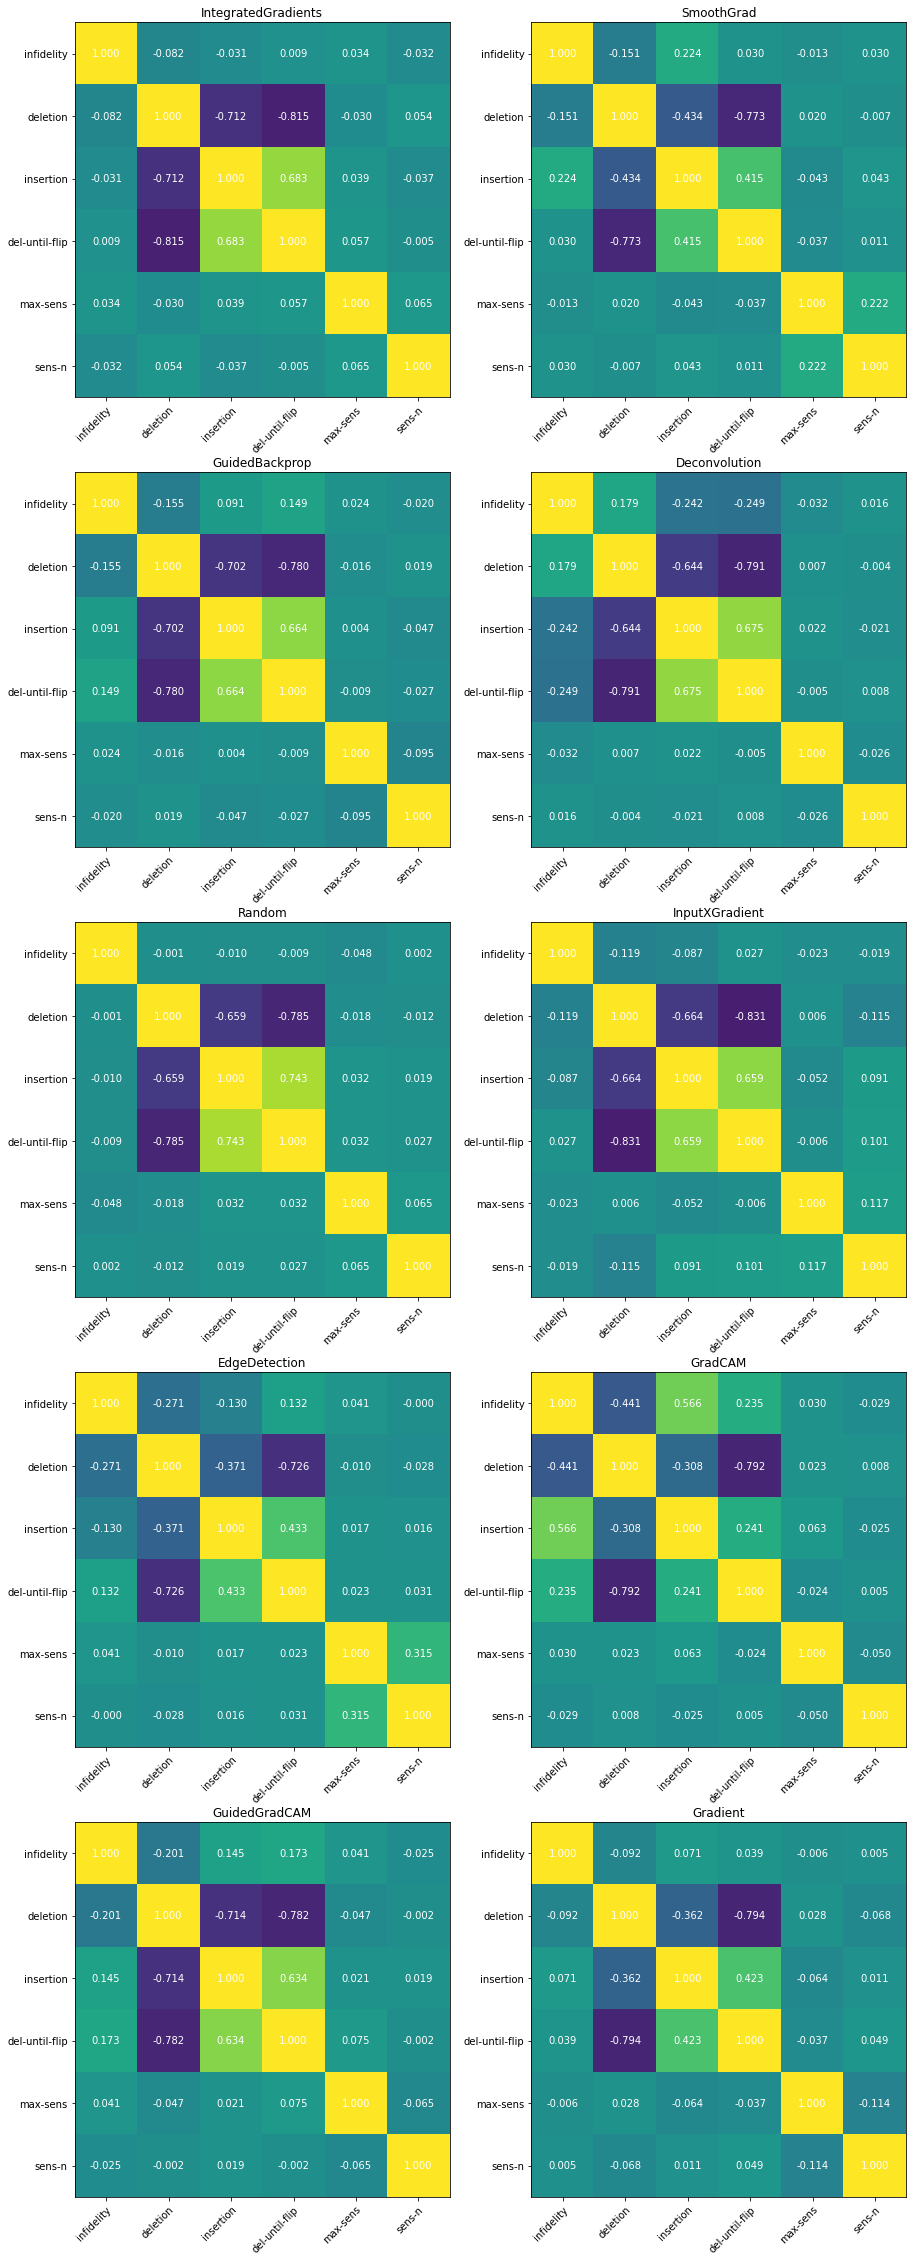

In [49]:
def method_pearson_heatmap(method, ax=None):
    method_data = all_data[method]
    if not ax:
        fig, ax = plt.subplots(figsize=(5,5))
    metrics = ["infidelity", "deletion", "insertion", "del-until-flip", "max-sens", "sens-n"]
    aggregated_data = []
    for metric in metrics:
        if metric == "deletion":
            aggregated_data.append(-np.mean(method_data[metric], axis=1))
        else:
            aggregated_data.append(np.mean(method_data[metric], axis=1) if len(method_data[metric].shape) == 2 else method_data[metric])
    corrs = np.corrcoef(np.vstack(aggregated_data))
    correlation_heatmap(ax, corrs, metrics, method)

fig, axs = plt.subplots(5, 2, figsize=(15, 40))
axs = axs.flatten()
for i, m in enumerate(methods):
    method_pearson_heatmap(m, axs[i])

### Spearman rank correlation

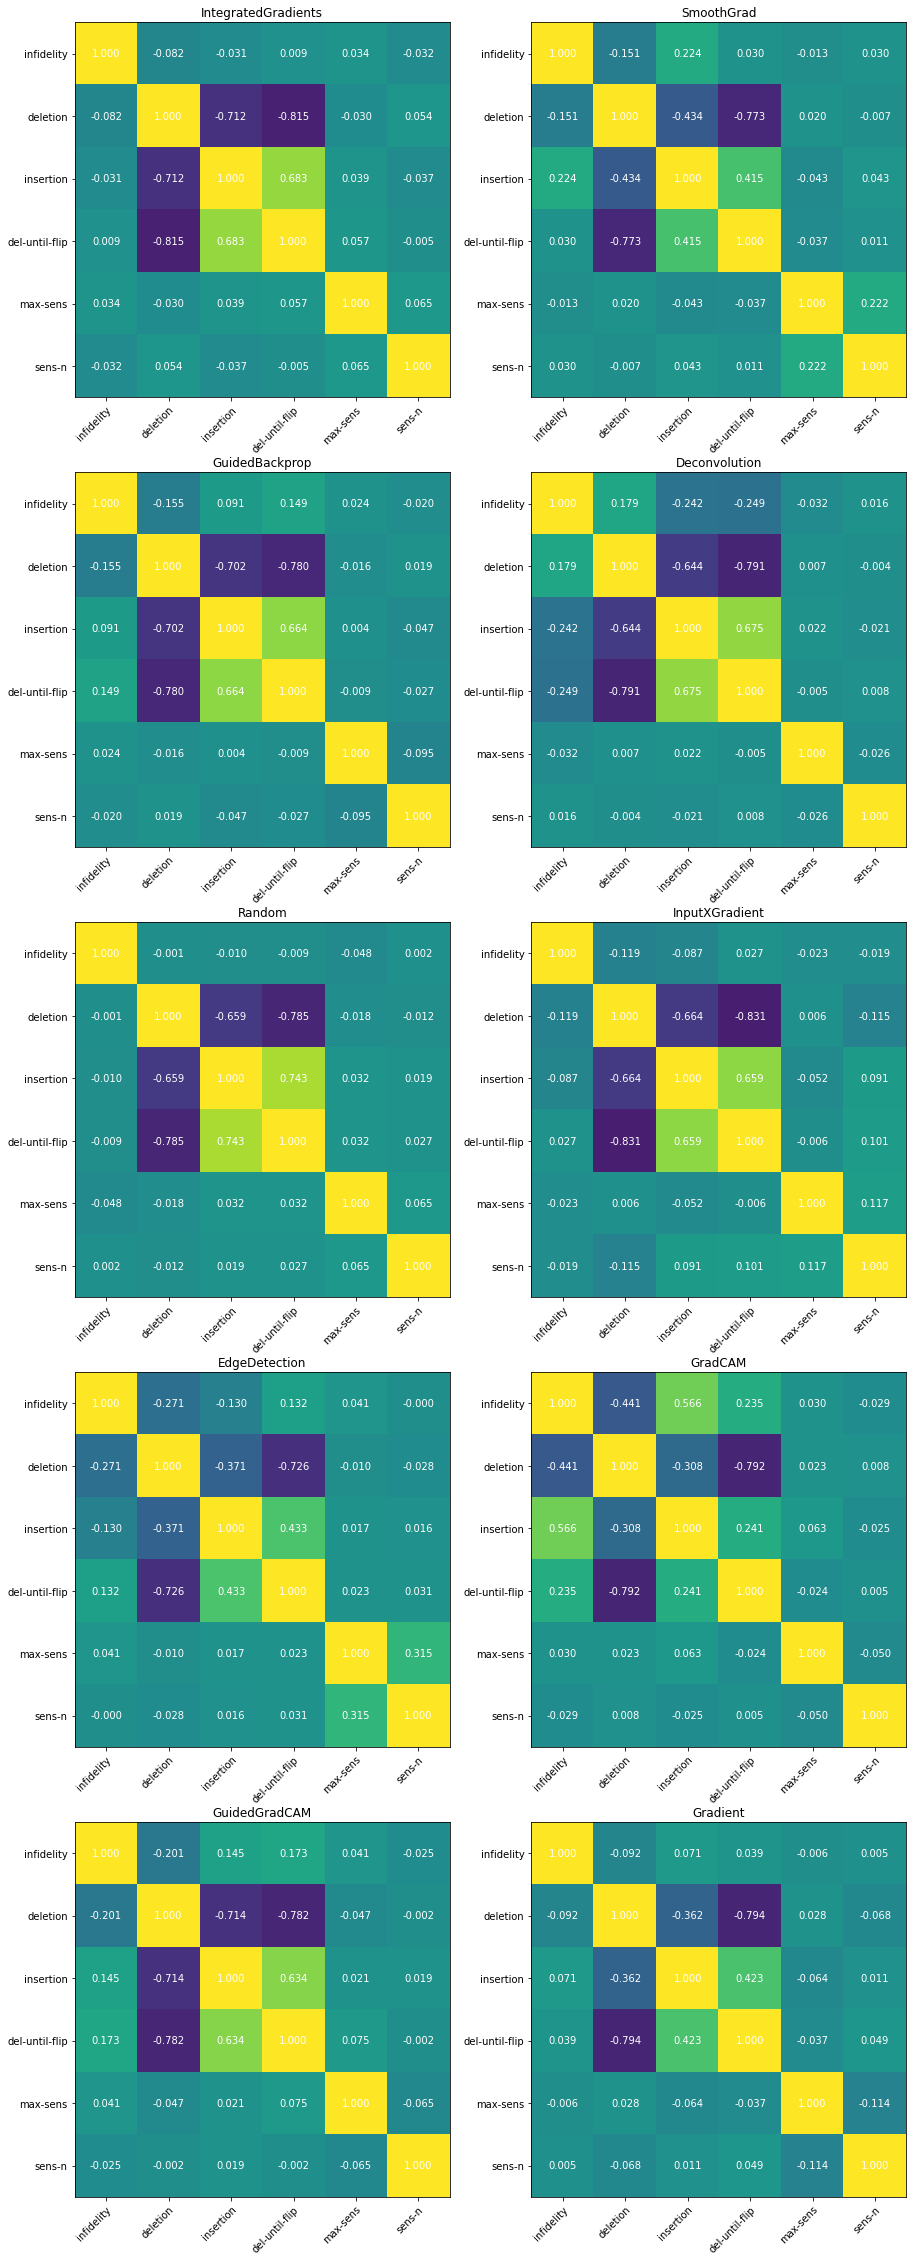

In [50]:
def method_spearman_heatmap(method, ax=None):
    method_data = all_data[method]
    if not ax:
        fig, ax = plt.subplots(figsize=(5,5))
    metrics = ["infidelity", "deletion", "insertion", "del-until-flip", "max-sens", "sens-n"]
    aggregated_data = []
    for metric in metrics:
        if metric == "deletion":
            aggregated_data.append(-np.mean(method_data[metric], axis=1))
        else:
            aggregated_data.append(np.mean(method_data[metric], axis=1) if len(method_data[metric].shape) == 2 else method_data[metric])
    corrs = spearmanr(np.vstack(aggregated_data), axis=1)[0]
    correlation_heatmap(ax, corrs, metrics, method)

fig, axs = plt.subplots(5, 2, figsize=(15, 40))
axs = axs.flatten()
for i, m in enumerate(methods):
    method_pearson_heatmap(m, axs[i])

## Individual sample plots for given method and metric
Instead of looking at the aggregated, average curve, we plot the curve for each of the samples where applicable.

## Covariate plots
We look at the scatterplots defined by any pair of metrics for a given method